In [203]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr     

In [204]:
#check this link to view details of the wine dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html?highlight=wine%20dataset#sklearn.datasets.load_wine

wine=load_wine()
df1=pd.DataFrame(wine.data)
df1.columns=wine.feature_names
df1.head(3)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0

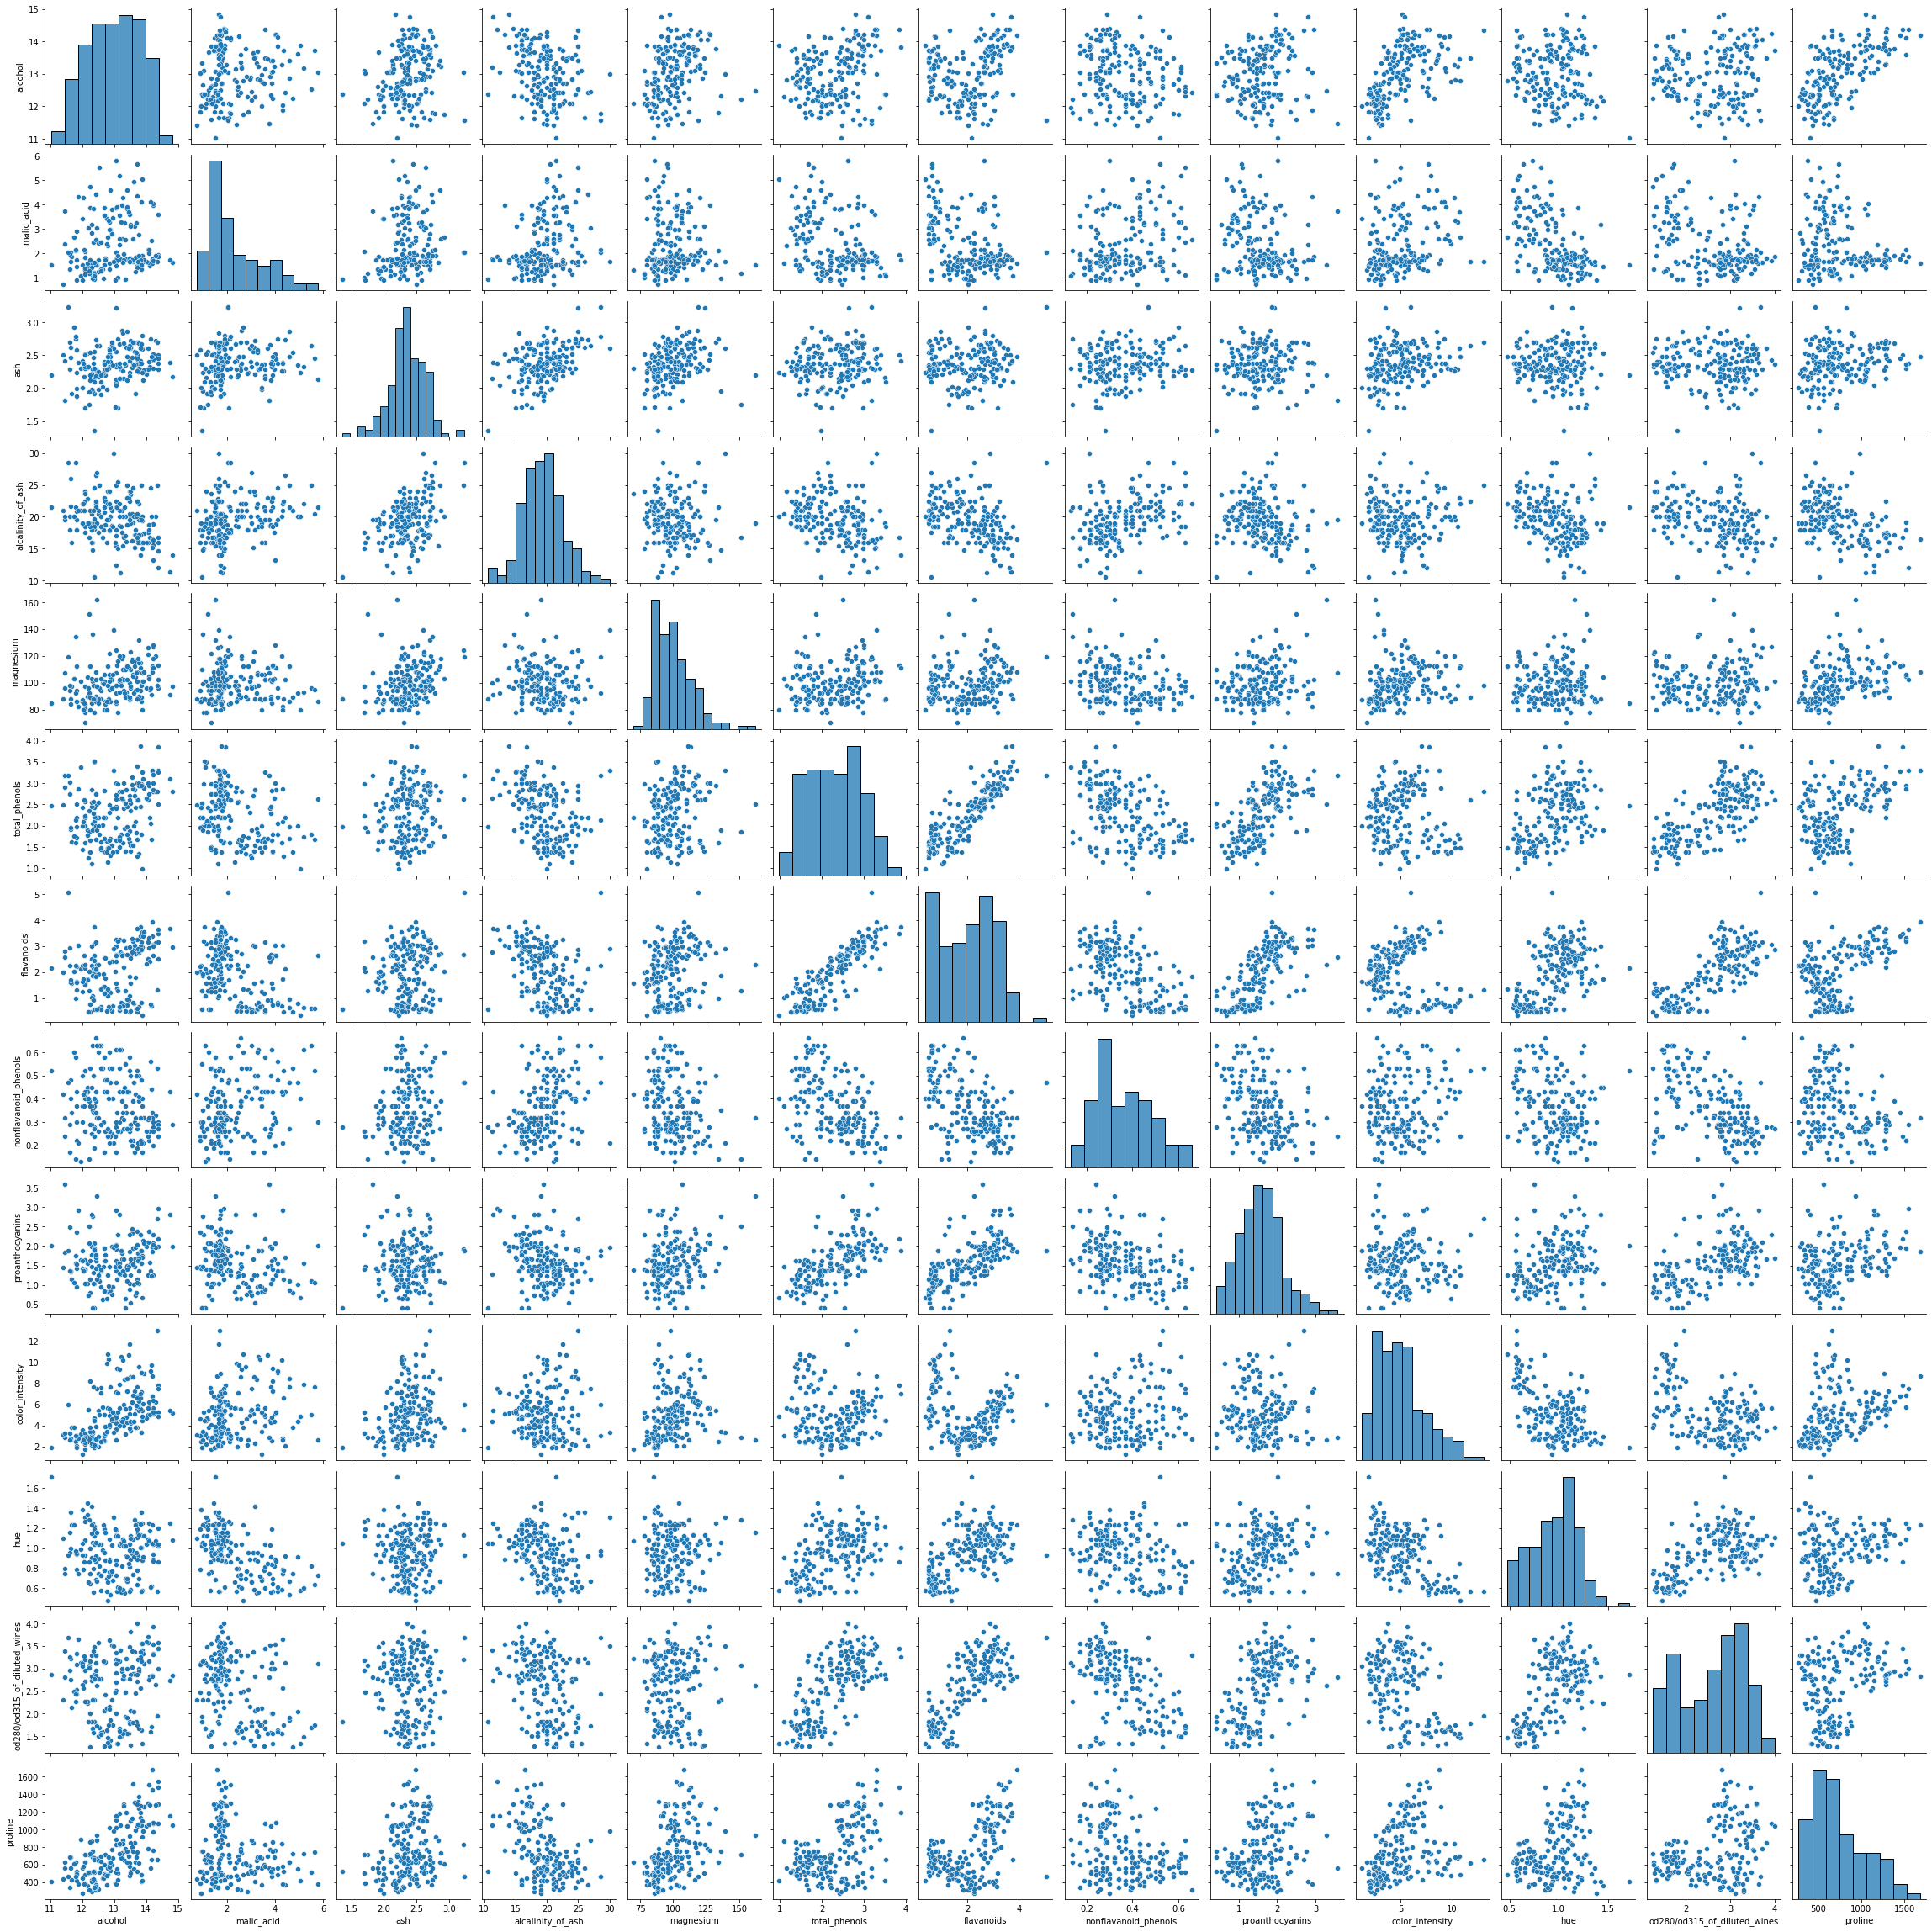

In [75]:
sn.pairplot(df1)

# Covariance

## Relationship with positive trend

<AxesSubplot:xlabel='proline', ylabel='alcohol'>

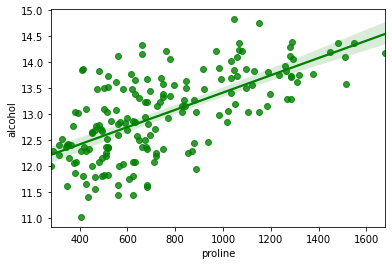

In [205]:
sn.regplot(data=df1,x='proline',y='alcohol',color='green')

In [206]:
positive_df=df1[['proline','alcohol']]
positive_df

proline  alcohol
0     1065.0    14.23
1     1050.0    13.20
2     1185.0    13.16
3     1480.0    14.37
4      735.0    13.24
..       ...      ...
173    740.0    13.71
174    750.0    13.40
175    835.0    13.27
176    840.0    13.17
177    560.0    14.13

[178 rows x 2 columns]

In [207]:
#The covariance of the two columns is 164.567185, The other two values are covariance with the column itself
positive_df.cov()

proline     alcohol
proline  99166.717355  164.567185
alcohol    164.567185    0.659062

## Relationship with negative trend

<AxesSubplot:xlabel='malic_acid', ylabel='hue'>

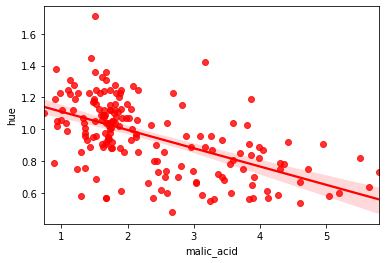

In [208]:
sn.regplot(data=df1,x='malic_acid',y='hue',color='red')

In [209]:
negative_df=df1[['malic_acid','hue']]
negative_df

malic_acid   hue
0          1.71  1.04
1          1.78  1.05
2          2.36  1.03
3          1.95  0.86
4          2.59  1.04
..          ...   ...
173        5.65  0.64
174        3.91  0.70
175        4.28  0.59
176        2.59  0.60
177        4.10  0.61

[178 rows x 2 columns]

In [210]:
#The covariance between the two columns is -0.143326, The other two values are covariance with the column itself
negative_df.cov()

malic_acid       hue
malic_acid    1.248015 -0.143326
hue          -0.143326  0.052245

## For No trend

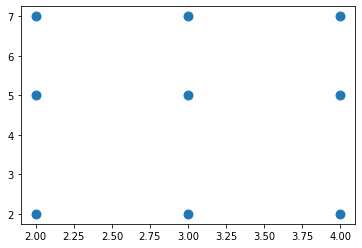

In [211]:
x1=[2,4,3,2,4,3,2,4,3]
y1=[2,2,2,5,5,5,7,7,7]
plt.scatter(x=x1,y=y1,s=80)

In [218]:
#The covariance between the two arrays is 0, The other two values are covariance with the array itself
np.cov(x1,y1)

array([[0.75, 0.  ],
       [0.  , 4.75]])

# Correlation

## Positive correlation

<AxesSubplot:xlabel='proline', ylabel='alcohol'>

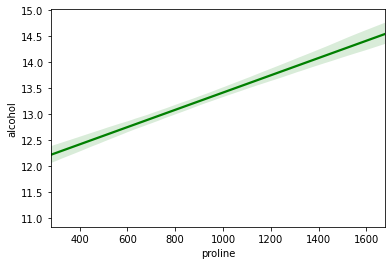

In [212]:
sn.regplot(data=df1,x='proline',y='alcohol',color='green',scatter_kws={'s':0})

In [213]:
#positive value for positive corr
df1['proline'].corr(df1['alcohol'])

0.6437200371782135

## Negative Correlation

<AxesSubplot:xlabel='malic_acid', ylabel='hue'>

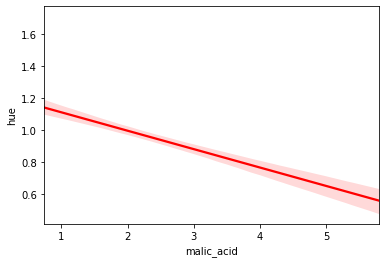

In [214]:
sn.regplot(data=df1,x='malic_acid',y='hue',color='red',scatter_kws={'s':0})

In [215]:
#negative value for negative corr
df1['malic_acid'].corr(df1['hue'])

-0.561295688664945

## No correlation

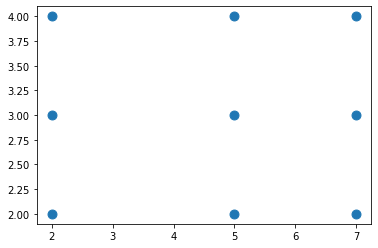

In [216]:
y2=pd.Series((x1))
x2=pd.Series(y1)
plt.scatter(x=x2,y=y2,s=80)

In [217]:
#The first value is correlation and the second value in the output is p-value
pearsonr(x1,y1)

(0.0, 1.0000000000000004)

In [202]:
#rechecking the correlation value with a different formula
x2.corr(y2)

0.0